In [2]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

# Example 1: Simple Example

Circuit:
q1: ───X───M('result')───

Measurement results statistics:
Counter({1: 100})


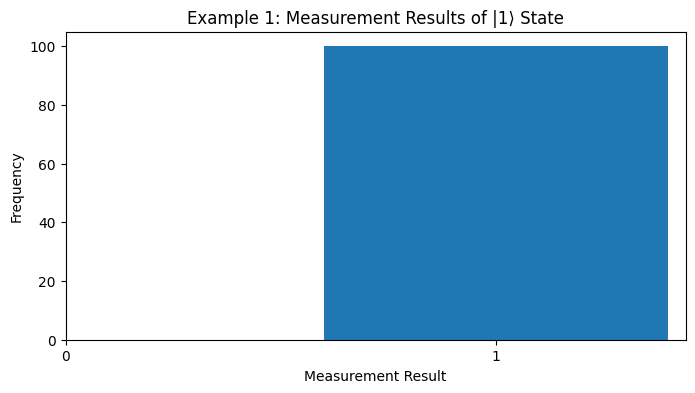

In [3]:
# Create a qubit (|0⟩ state by default)
q1 = cirq.NamedQubit('q1')

# Create a circuit
circuit1 = cirq.Circuit()
circuit1.append(cirq.X(q1))
circuit1.append(cirq.measure(q1, key='result'))

print("Circuit:")
print(circuit1)

# Simulate the circuit
simulator = cirq.Simulator()
result1 = simulator.run(circuit1, repetitions=100)

# Print measurement results
print("\nMeasurement results statistics:")
print(result1.histogram(key='result'))

# Visualize results
counts1 = result1.histogram(key='result')
plt.figure(figsize=(8, 4))
plt.bar(counts1.keys(), counts1.values())
plt.xlabel('Measurement Result')
plt.ylabel('Frequency')
plt.title('Example 1: Measurement Results of |1⟩ State')
plt.xticks([0, 1])
plt.show()

# Example 2: H Gate

Circuit 2a (|0⟩ → H → measure):
q2: ───H───M('result')───

Circuit 2b (|1⟩ → H → measure):
q2: ───X───H───M('result')───

Measurement results after H gate on |0⟩:
Counter({1: 516, 0: 484})

Measurement results after H gate on |1⟩:
Counter({0: 507, 1: 493})


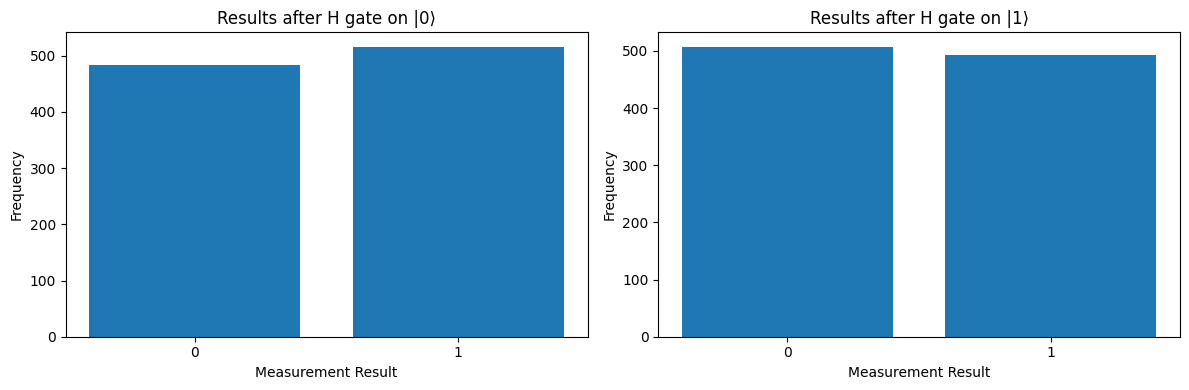

In [4]:
q2 = cirq.NamedQubit('q2')
circuit2a = cirq.Circuit()
circuit2b = cirq.Circuit()
circuit2a.append(cirq.H(q2))
circuit2a.append(cirq.measure(q2, key='result'))
circuit2b.append(cirq.X(q2))
circuit2b.append(cirq.H(q2))
circuit2b.append(cirq.measure(q2, key='result'))
print("Circuit 2a (|0⟩ → H → measure):")
print(circuit2a)
print("\nCircuit 2b (|1⟩ → H → measure):")
print(circuit2b)
result2a = simulator.run(circuit2a, repetitions=1000)
result2b = simulator.run(circuit2b, repetitions=1000)

print("\nMeasurement results after H gate on |0⟩:")
print(result2a.histogram(key='result'))
print("\nMeasurement results after H gate on |1⟩:")
print(result2b.histogram(key='result'))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

counts2a = result2a.histogram(key='result')
ax1.bar(counts2a.keys(), counts2a.values())
ax1.set_xlabel('Measurement Result')
ax1.set_ylabel('Frequency')
ax1.set_title('Results after H gate on |0⟩')
ax1.set_xticks([0, 1])

counts2b = result2b.histogram(key='result')
ax2.bar(counts2b.keys(), counts2b.values())
ax2.set_xlabel('Measurement Result')
ax2.set_ylabel('Frequency')
ax2.set_title('Results after H gate on |1⟩')
ax2.set_xticks([0, 1])

plt.tight_layout()
plt.show()

# Example 3: 2 qubits

Circuit 3a (direct measurement of two qubits):
q3a: ───H───M('result')───
            │
q3b: ───H───M─────────────

Circuit 3b (Bell state measurement):
q3a: ───H───@───M('result')───
            │   │
q3b: ───────X───M─────────────

Direct measurement results of two qubits:
Counter({1: 261, 0: 252, 2: 245, 3: 242})

Bell state measurement results:
Counter({3: 501, 0: 499})


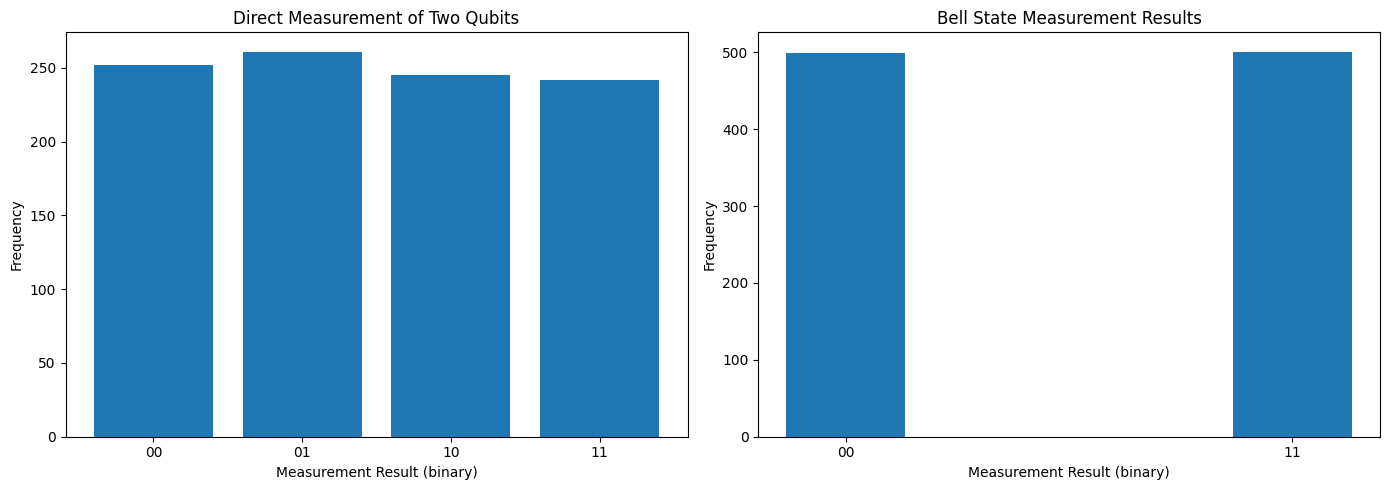

In [5]:
q3a = cirq.NamedQubit('q3a')
q3b = cirq.NamedQubit('q3b')

circuit3a = cirq.Circuit()
circuit3b = cirq.Circuit()

circuit3a.append(cirq.H(q3a))
circuit3a.append(cirq.H(q3b))
circuit3a.append(cirq.measure(q3a, q3b, key='result'))

circuit3b.append(cirq.H(q3a))
circuit3b.append(cirq.CNOT(q3a, q3b))
circuit3b.append(cirq.measure(q3a, q3b, key='result'))

print("Circuit 3a (direct measurement of two qubits):")
print(circuit3a)
print("\nCircuit 3b (Bell state measurement):")
print(circuit3b)

result3a = simulator.run(circuit3a, repetitions=1000)
result3b = simulator.run(circuit3b, repetitions=1000)

print("\nDirect measurement results of two qubits:")
print(result3a.histogram(key='result'))
print("\nBell state measurement results:")
print(result3b.histogram(key='result'))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

counts3a = result3a.histogram(key='result')
ax1.bar(counts3a.keys(), counts3a.values())
ax1.set_xlabel('Measurement Result (binary)')
ax1.set_ylabel('Frequency')
ax1.set_title('Direct Measurement of Two Qubits')
ax1.set_xticks(list(counts3a.keys()))
ax1.set_xticklabels([f'{i:02b}' for i in counts3a.keys()])

counts3b = result3b.histogram(key='result')
ax2.bar(counts3b.keys(), counts3b.values())
ax2.set_xlabel('Measurement Result (binary)')
ax2.set_ylabel('Frequency')
ax2.set_title('Bell State Measurement Results')
ax2.set_xticks(list(counts3b.keys()))
ax2.set_xticklabels([f'{i:02b}' for i in counts3b.keys()])

plt.tight_layout()
plt.show()

# Example 4: Create a Given State

You can use this code in your HW4

ry and rz gates: rotation in the Bloch Sphere

State to be teleported: (-0.3127)|0⟩ + (-0.9340+0.1727j)β|1⟩, where |α|^2 = 0.0978, |β|^2 = 0.9022


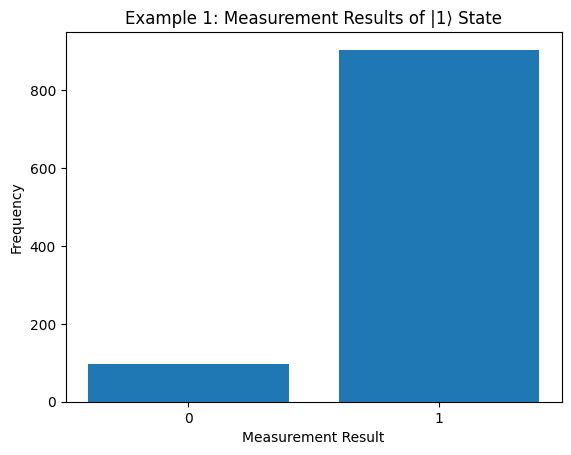

In [6]:
def get_random_state():
   theta = np.random.random() * 2 * np.pi
   phi = np.random.random() * 2 * np.pi
   return np.cos(theta/2), np.exp(1j*phi) * np.sin(theta/2)
alpha, beta = get_random_state()
print(f"State to be teleported: ({alpha:.4f})|0⟩ + ({beta:.4f})β|1⟩, where |α|^2 = {abs(alpha)**2:.4f}, |β|^2 = {abs(beta)**2:.4f}")

q4 = cirq.NamedQubit('q4')
circuit = cirq.Circuit()

theta = 2 * np.arccos(np.abs(alpha))
if np.abs(beta) > 1e-15:
   phi = np.angle(beta)
else:
   phi = 0

circuit.append(cirq.ry(theta)(q4))
if phi != 0:
   circuit.append(cirq.rz(phi)(q4))
circuit.append(cirq.measure(q4, key='result'))

result4 = simulator.run(circuit, repetitions=1000)
counts4 = result4.histogram(key='result')

plt.bar(counts4.keys(), counts4.values())
plt.xlabel('Measurement Result')
plt.ylabel('Frequency')
plt.title('Example 1: Measurement Results of |1⟩ State')
plt.xticks([0, 1])
plt.show()
